In [10]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

0.5 34.5 74.5
[0.5] 34.500000000000014 74.5


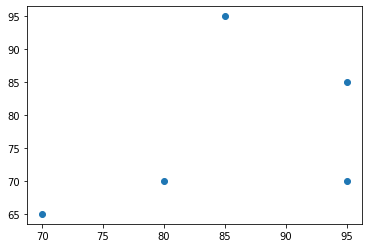

In [11]:
class UnivariateLinReg:
    def fit(self, x, y):
        n = len(x)
        mu_x, mu_y = np.mean(x), np.mean(y)
        numer = np.sum(np.multiply(x - mu_x, y - mu_y))
        denom = np.sum((x - mu_x)**2)
        self.slope = numer / denom
        self.intercept = mu_y - self.slope * mu_x
    def predict(self, x_test):
        return np.multiply(self.slope, x_test) + self.intercept

x = np.array([95,85,80,70,95]) # (5,)
y = np.array([85,95,70,65,70])
plt.scatter(x,y)
x0 = 80

linreg = UnivariateLinReg()
linreg.fit(x, y)
print(linreg.slope, linreg.intercept, linreg.predict(x0))

# sklearn's linear_model takes x in the shape of (n,d)
x_reshape = np.array(x).reshape(-1, 1) # (5,1)
lm = LinearRegression()
lm.fit(x_reshape, y)
pred = lm.intercept_ + x0*lm.coef_[0]
print(lm.coef_, lm.intercept_, pred)


In [12]:
class LinearRegAnalytical:

    def __add_intercept(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))
    
    def __loss(self, X, y):
        err = y - np.dot(X, self.theta)
        return np.dot(err.T, err)
    
    @property
    def loss(self):
        return self._loss

    def fit(self, X, y, delta=0.0):
        """
        X.shape=(n,d)
        Y.shape=(n,1)
        """
        d = X.shape[1]
        X = self.__add_intercept(X)
        XtX = np.dot(X.T, X)
        print("X:")
        print(X)
        print("XtX with rank {}".format(np.linalg.matrix_rank(XtX)))
        print(XtX)
        term1 = np.linalg.inv(XtX + delta * np.eye(d+1)) # or np.linalg.pinv
        term2 = np.dot(X.T, y)
        self.theta = np.dot(term1, term2)
        self._loss = self.__loss(X, Y)

    def predict(self, X_test):
        """
        X_test.shape=(m,d)
        """
        X = self.__add_intercept(X_test)
        return np.dot(X, self.theta)
 

In [13]:
X = np.array([[1,1], [1,2], [2,2], [2,3]]) # shape=(4,2)
Y = np.dot(X, np.array([1,2])) + 3 # known linear function
Y = Y.reshape((-1,1)) # shape=(4,1)
x0 = np.array([[3,4], [2,4], [2,2]]) # shape=(3,2)
y0 = np.array([[14], [13], [9]])

linreg = LinearRegAnalytical()
linreg.fit(X, Y)
pred = linreg.predict(x0)
print("params:", linreg.theta)
print("loss:", linreg.loss)
print("prediction: ", pred)
print("prediction mse: ", np.mean((y0-pred) ** 2))

X:
[[1. 1. 1.]
 [1. 1. 2.]
 [1. 2. 2.]
 [1. 2. 3.]]
XtX with rank 3
[[ 4.  6.  8.]
 [ 6. 10. 13.]
 [ 8. 13. 18.]]
params: [[3.]
 [1.]
 [2.]]
loss: [[0.]]
prediction:  [[14.]
 [13.]
 [ 9.]]
prediction mse:  0.0


In [38]:
X = np.array([[1,1], [1,2], [1,2]]) # shape=(4,2)
Y = np.dot(X, np.array([1, 2])) + 3 # known linear function
Y = Y.reshape((-1,1)) # shape=(4,1)
x0 = np.array([[3,4], [2,4], [2,2]]) # shape=(3,2)
y0 = np.array([[14], [13], [9]])

linreg = LinearRegAnalytical()
linreg.fit(X, Y, delta=0.001)
pred = linreg.predict(x0)
print("params:", linreg.theta)
print("loss:", linreg.loss)
print("prediction: ", pred)
print("prediction mse: ", np.mean((y0-pred) ** 2))

X:
[[1. 1. 1.]
 [1. 1. 2.]
 [1. 1. 2.]]
XtX with rank 2
[[3. 3. 5.]
 [3. 3. 5.]
 [5. 5. 9.]]
params: [[1.99800697]
 [1.99800697]
 [2.00199203]]
loss: [[3.97613135e-06]]
prediction:  [[15.99999601]
 [14.00198904]
 [ 9.99800498]]
prediction mse:  1.999993346988938


In [7]:
class LinearReg:
    def __init__(self, lr=0.001, num_iters=1000000):
        self.lr = lr
        self.num_iters = num_iters

    def __add_intercept(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))
    
    def __loss(self, X, Y):
        err = Y - np.dot(X, self.theta)
        return np.dot(err.T, err)
    
    @property
    def loss(self):
        return self._loss

    def fit(self, X, Y):
        """
        X.shape=(n,d)
        Y.shape=(n,1)
        """
        d = X.shape[1]
        X = self.__add_intercept(X)
        #self._loss = []
        self.theta = np.zeros((d+1, 1))
        for _ in range(self.num_iters):
            gradient = -2 * np.dot(X.T, Y) + 2 * np.dot(np.dot(X.T, X), self.theta)
            self.theta -= self.lr * gradient
        self._loss = self.__loss(X, Y)

    def predict(self, X_test):
        """
        X_test.shape=(m,d)
        """
        X = self.__add_intercept(X_test)
        return np.dot(X, self.theta)
        
#X = np.array([[1, 2], [2, 5]]) # degenerate case
#X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) # shape=(4,2)
X = np.array([[1,1], [1,2], [1,2]]) # shape=(4,2)
Y = np.dot(X, np.array([1, 2])) + 3 # known linear function
Y = Y.reshape((-1,1)) # shape=(4,1)
x0 = np.array([[3,4], [2,4], [2,2]]) # shape=(3,2)
y0 = np.array([[14], [13], [9]])

linreg = LinearReg()
linreg.fit(X, Y)
pred = linreg.predict(x0)
print("params:", linreg.theta)
#print("loss:", linreg.loss)
print("prediction: ", pred)
print("prediction mse: ", np.mean((y0-pred) ** 2))


lm = LinearRegression()
lm.fit(X, Y)
pred = lm.predict(x0)
print(lm.intercept_, lm.coef_)
print(pred)
print(np.mean((y0-pred) ** 2))


params: [[2.]
 [2.]
 [2.]]
prediction:  [[16.]
 [14.]
 [10.]]
prediction mse:  2.0000000000003815
[4.] [[0. 2.]]
[[12.]
 [12.]
 [ 8.]]
2.0000000000000036
